<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/D_phylo_signal_R_87t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rm(list=ls())
##06-nov-2022
#Try phylo signal test D
#https://wiki.duke.edu/display/AnthroTree/5.5.1+Fritz+and+Purvis%27+D+in+R






UsageError: Cell magic `%%R` not found.


In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
install.packages("caper")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ape’, ‘mvtnorm’

trying URL 'https://cran.rstudio.com/src/contrib/ape_5.8-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.3-3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/caper_1.0.3.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpoPkhKN/downloaded_packages’


In [ ]:
%%R
library("caper")

Loading required package: ape
Loading required package: MASS
Loading required package: mvtnorm


In [ ]:
%%R
tree <-read.tree("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.87t.WAonly.tree")
dd <- read.csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/processed_species_87t.csv")



In [ ]:
%%R
head(dd,4)

                 species WA   Age Ploidy log.length log.area  log.turn
1   Blackallia_nudiflora  1 13.04      2   2.637490 4.615813 -1.085467
2     Cryptandra_apetala  1 10.08      2   2.904174 5.018804 -1.085238
3 Cryptandra_arbutiflora  1  4.20      3   2.948902 5.157170 -1.053007
4   Cryptandra_aridicola  1  4.25      2   2.795185 5.218620 -1.047692
   log.netd  log.spec              species.1 Rare..Yes.No. EPBC WA.Ranking
1 -1.089471 -1.087464   Blackallia nudiflora             1    0          3
2 -1.089242 -1.087236     Cryptandra apetala             0    0          0
3 -1.057065 -1.055031 Cryptandra arbutiflora             0    0          0
4 -1.051777 -1.049730   Cryptandra aridicola             0    0          0
  January February March April May June July August September October November
1      NA       NA    NA    NA  NA   NA   NA     NA        NA      NA       NA
2      NA       NA    NA    NA  NA   NA   NA      1         1       1       NA
3      NA       NA    NA    NA   

In [ ]:
%%R
colnames(dd)

 [1] "species"       "WA"            "Age"           "Ploidy"       
 [5] "log.length"    "log.area"      "log.turn"      "log.netd"     
 [9] "log.spec"      "species.1"     "Rare..Yes.No." "EPBC"         
[13] "WA.Ranking"    "January"       "February"      "March"        
[17] "April"         "May"           "June"          "July"         
[21] "August"        "September"     "October"       "November"     
[25] "December"      "log.b19"       "log.b18"       "log.b17"      
[29] "log.b16"       "log.b15"       "log.b14"       "log.b13"      
[33] "log.b12"       "log.b11"       "log.b10"       "log.b9"       
[37] "log.b8"        "log.b7"        "log.b6"        "log.b5"       
[41] "log.b4"        "log.b3"        "log.b2"        "log.b1"       


In [ ]:
%%R
tree$tip.label

 [1] "Trymalium_angustifolium"    "Trymalium_urceolare"       
 [3] "Trymalium_ledifolium"       "Trymalium_monospermum"     
 [5] "Trymalium_litorale"         "Trymalium_odoratissimum"   
 [7] "Trymalium_spatulatum"       "Trymalium_daphnifolium"    
 [9] "Trymalium_myrtillus"        "Trymalium_elachophyllum"   
[11] "Polianthion_wichurae"       "Polianthion_biloculare"    
[13] "Polianthion_collinum"       "Stenanthemum_notiale"      
[15] "Stenanthemum_radiatum"      "Stenanthemum_intricatum"   
[17] "Stenanthemum_divaricatum"   "Stenanthemum_nanum"        
[19] "Stenanthemum_coronatum"     "Stenanthemum_limitatum"    
[21] "Stenanthemum_emarginatum"   "Stenanthemum_tridentatum"  
[23] "Stenanthemum_reissekii"     "Stenanthemum_complicatum"  
[25] "Stenanthemum_pumilum"       "Stenanthemum_humile"       
[27] "Stenanthemum_sublineare"    "Stenanthemum_yorkense"     
[29] "Stenanthemum_mediale"       "Stenanthemum_petraeum"     
[31] "Stenanthemum_pomaderroides" "Stenanthemum_bremere

In [ ]:
%%R
# which are mismatched?
tree_not_dd <- tree$tip.label[which(!tree$tip.label %in% dd$species)]
dd_not_tree <- dd$species[which(!dd$species %in% tree$tip.label)]

# drop mismatched
dd <- dd[which(!dd$species %in% dd_not_tree ),]
tree <- drop.tip(tree, tree_not_dd)

In [ ]:
%%R
# double check they match
all(dd$species %in% tree$tip.label)


[1] TRUE


In [ ]:
%%R
all(tree$tip.label %in% dd$species)


[1] TRUE


In [ ]:
%%R
dd <- dd[match(tree$tip.label, dd$species), ]

[1] 87


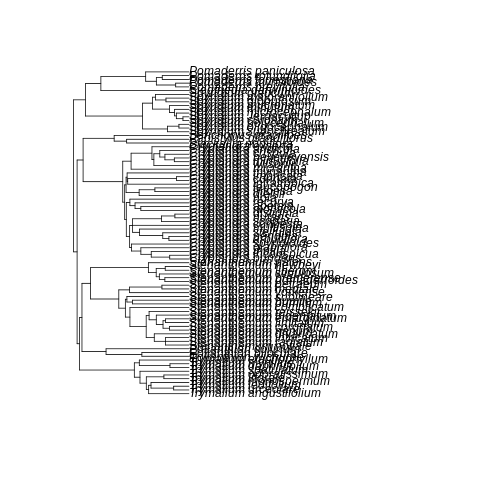

In [ ]:
%%R
plot(tree)
Ntip(tree)

In [ ]:
%%R
dd$Ploidy

 [1] 2 2 2 2 3 2 2 2 2 2 2 2 4 4 2 4 2 2 3 2 2 4 2 2 2 4 2 2 4 2 2 2 4 2 2 4 3 2
[39] 2 2 4 3 2 2 3 3 4 3 4 2 2 3 2 2 4 3 2 2 2 4 2 4 4 3 4 2 4 2 2 2 2 2 2 3 4 2
[77] 4 3 4 2 3 2 2 2 3 2 3


In [ ]:
%%R
dd$WA.Ranking


 [1] 0 0 0 2 1 0 0 0 0 0 0 4 3 0 2 0 3 0 0 2 0 0 0 0 0 0 2 1 1 0 0 4 0 1 3 1 0 2
[39] 0 2 0 0 1 3 0 4 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 3 3 0 1 3 2 3 2 3 0 0 0 0
[77] 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
%%R
# Create a binary variable from the 'Ploidy' column
# Assuming values > 0 are one category (1) and value == 0 is the other (0)
dd$WA.Ranking <- as.numeric(dd$WA.Ranking > 0)

#after match tree and dataset
primate <- comparative.data(phy = tree, data = dd, names.col = species, vcv = TRUE, na.omit = FALSE, warn.dropped = TRUE)

In [ ]:
%%R
dd$WA.Ranking

 [1] 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1
[39] 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0
[77] 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
%%R
#D stat BINARY ONLY
#To estimate D we use function 'phylo.d'
result = phylo.d(data=primate, binvar = WA.Ranking, permut = 10000)
result



Calculation of D statistic for the phylogenetic structure of a binary variable

  Data :  dd
  Binary variable :  WA.Ranking
  Counts of states:  0 = 58
                     1 = 29
  Phylogeny :  tree
  Number of permutations :  10000

Estimated D :  0.8580936
Probability of E(D) resulting from no (random) phylogenetic structure :  0.2265
Probability of E(D) resulting from Brownian phylogenetic structure    :  0.003



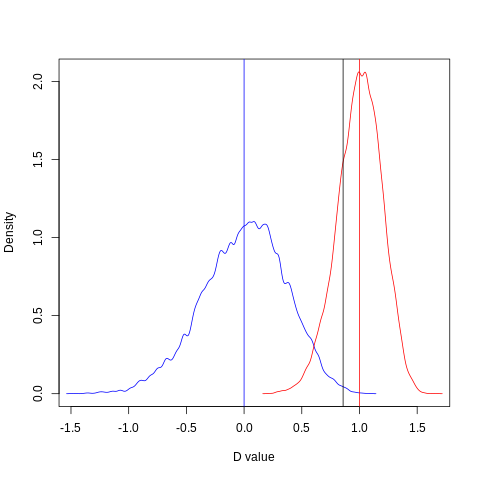

In [ ]:
%%R
plot(result)